# Task 1: Data Preparation

### Imports & format checks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import nessasary libraries

In [2]:
# Load the data from the file NBA_players_stats.csv using pandas library.
NBA = pd.read_csv('NBA_players_stats.csv', index_col=0) #prevent index number from affecting result

In [3]:
NBA.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [4]:
NBA.dtypes # Get data type for each column & verify they are correct

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [5]:
missing = False 
for feature in NBA:
    for observation in feature:
        if observation is None or observation == '' or observation == np.NaN: # check for None types, empty strings, or the NumPy type NaN
            missing = True
if missing == True:
    print("There are missing values")
else:
    print("There are no missing values")

There are no missing values


The code above checks for any missing values in the dataset, which can be done by inspection but it will take a while.
As we see, there are no missing values. 

This code shows us players who appear more than once in the dataset, as well as the row the duplicate is located and deal with it when cleaning the data. 

In [6]:
duplicate_names = NBA.duplicated('Player')
NBA[['Player']][duplicate_names]

,Player
Rk,
9,Jarrett Allen
9,Jarrett Allen
182,James Harden
182,James Harden
238,Damian Jones
238,Damian Jones
255,Rodions Kurucs
255,Rodions Kurucs
263,Alex Len


## Data Cleaning and checking
First check for errors then clean the data where nessasary

### Data Cleaning - Player

In [7]:
NBA['Player'] = NBA['Player'].astype(pd.StringDtype()) # Cast data type String onto the column for Player names since python does not detect it as a string. 

### Data Cleaning - Pos

In [8]:
NBA['Pos'] = NBA['Pos'].str.lstrip()  # or remove space at d begining of a string
NBA['Pos'] = NBA['Pos'].str.rstrip()  #remove space at d end of a string

# replacing some irregular values in Pos column
NBA['Pos'] = NBA['Pos'].replace('SGa', 'SG')  
NBA['Pos'] = NBA['Pos'].replace('sg', 'SG')
NBA['Pos'] = NBA['Pos'].replace('SF.', 'SF')
NBA['Pos'] = NBA['Pos'].replace('Sf', 'SF')

NBA['Pos'] = NBA['Pos'].replace('pg', 'PG')

NBA['Pos'] = NBA['Pos'].replace('PFa', 'PF')
NBA['Pos'] = NBA['Pos'].replace('Pg', 'PG')
NBA['Pos'] = NBA['Pos'].astype(pd.StringDtype()) 

### Data Cleaning - Age

In [9]:
min = NBA["Age"].min()
max = NBA["Age"].max()
print ("The youngest player is aged: ", min)
print ("The oldest player is aged: ", max)

The youngest player is aged:  -19
The oldest player is aged:  280


Upon checking the Age, we see the youngest player is age: -19 and the oldest is 280. These are obviously outside the human life expectancy. 

In [10]:
print("Players who are over 40: ")
NBA[['Age', 'Player']][NBA.Age > 40]

Players who are over 40: 


,Age,Player
Rk,,
161,280,Anthony Gill


In [11]:
print("Players who are under 18: ")  
NBA[['Age', 'Player']][NBA.Age < 18]

Players who are under 18: 


,Age,Player
Rk,,
194,-19,Killian Hayes


remove the irregular values on age column and set them to the 'intended' input.

In [12]:
NBA['Age'] = np.where((NBA.Age == 280), 28, NBA.Age)
NBA['Age'] = np.where((NBA.Age == -19), 19, NBA.Age)

### Data Cleaning - Team

In [13]:
NBA['Tm'] = NBA['Tm'].astype(pd.StringDtype()) 
NBA['Tm'] = NBA['Tm'].str.rstrip() # remove space at d end of a string
NBA['Tm'] = NBA['Tm'].str.lstrip()  # remove space at d begining of a string
NBA['Tm'] = NBA['Tm'].replace('H0U', 'HOU')
NBA['Tm'] = NBA['Tm'].replace('NyK', 'NYK')

### Data Cleaning - G

In [14]:
NBA.G.max()    # Should be less than 82 if data is correct

38

In [15]:
NBA.G.unique()

array([35,  7, 33, 21,  3, 28, 23, 12,  9, 30, 26, 34, 25, 18, 36, 17, 37,
       13, 32, 27,  4, 16, 19, 11, 15,  6, 14, 22, 31,  1, 10, 29, 20,  2,
        5, 24,  8, 38], dtype=int64)

### Data Cleaning - GS

In [16]:
NBA.GS.unique()

array([ 2,  0, 33, 18,  3, 12, 17,  5,  6, 30, 35, 23, 16, 34, 15, 37, 29,
       26,  1, 36, 32, 28, 19,  7, 31, 20, 10, 22, 11,  8, 25, 24, 21, 27,
        4, 14,  9, 13], dtype=int64)

### Data Cleaning - MP

In [17]:
NBA.MP.unique()

array([ 491,   18,  918, 1119,  544,    8,  495,  551,  977,  320,  657,
        163,  829, 1189,   19,  227,  870,  667,  769,  198,  664,  646,
       1088,   49,  886,  888, 1010, 1048,  161,  639, 1179, 1227,  986,
        107, 1031,  649,  587, 1104, 1143, 1093,   50,  443,  783,  678,
        778,   13,  703,  148,  736,  342, 1038,   47,  249, 1102,   84,
         29,  196,  271, 1050,  851,    5,  211,  127,   28,    7, 1131,
        937, 1211,  846,  698, 1115,   31,  713,  231,  748,  841,  537,
        617,  729,   36,   17,  863,  488,  122,  949,    6,  289,  618,
        450,  577,  136,   27,  572,  726,   76,  154,  853,  697,   62,
        506, 1054,  194,  883,  376,  836, 1194,  755,  264,  442,  981,
        761,  371,   64,  960, 1125, 1040,  565,   10,  439,  408,  596,
        722,  679,  147,  105,  650,  990,  514,  180,  116,   57,  550,
         38,   34,  151,   40,  787,  125,  675,   20,  613, 1198,   33,
        215,   12,  343,  525,  262,  922,  904,  1

### Data Cleaning - FG

In [18]:
NBA.FG.unique()   #check for inappropriate value

array([ 84,   1, 115, 236,   0,  86,  67, 172,  44, 128,  17, 146, 368,
        26, 166, 101, 114,  21,  64,  68, 218,   4, 136, 195, 201, 175,
        35, 100, 184, 233, 148,  11, 108,  88, 158, 250,   5,  49,  79,
         2,  76,  24,  78,  58, 188,  23, 284,  31,  22, 132, 276, 176,
       118, 305,   7, 139,  59,  99,  92, 143,   8,  98,  51, 208,  30,
       106,  62,  70,  33, 140, 237,  20, 252, 161,  12,  91, 109,  54,
       123, 343, 204,  18, 194,  56,   6, 319, 149,  50, 116, 180, 199,
        29,  14, 103, 285,  60,  10,   9,  85,   3,  77, 121, 127, 293,
        41,  81,  38, 179, 225, 239, 196, 153, 254,  80,  39, 113, 122,
       190, 209,  69, 241,  46,  13, 245,  36, 151, 198,  61,  53,  95,
       159, 138,  94, 165, 169,  57, 306, 269, 154, 350,  15, 125,  65,
        28, 379, 111,  90, 177,  48,  47, 162, 287,  87,  42, 315, 141,
       112, 174,  55,  19,  16, 272, 135, 288,  40, 142, 207, 273,  25,
        72,  71, 152,  63,  93, 110, 202, 131, 145,  97, 211, 30

### Data Cleaning - FGA

In [19]:
NBA.FGA.unique()

array([145,   8, 187, 419, 248,   3, 211, 164, 257,  65, 192,  43, 306,
       661, 402, 269, 238,  50, 183, 157, 367,   7, 329, 390, 448, 409,
        67, 209, 374, 526, 335,  31, 229, 200, 175, 403, 764, 550,  15,
        86, 258, 177, 264,   5, 153,  47, 137, 120, 363,  11,  91, 435,
        22,  54,  45, 573, 322,   2,  66,  39,  10,   1, 328, 617, 444,
       616, 196,  71, 262, 244, 205, 227, 315,  17,   4, 224, 126,  28,
       353,  84, 198, 144, 112,  14, 272, 530,  29,  40, 470, 176,  26,
       210, 243, 271, 128, 718, 383, 401, 297, 108,  16, 668, 384, 197,
       141, 127, 253, 380, 359, 537,  63, 547,  51,  13, 131,  25,  21,
       180, 259, 282, 629, 104,  75, 207,  82, 407, 134, 451,  62, 468,
       106, 213, 350, 310, 586, 270, 174, 223,  36, 222,  44, 267,   0,
        18,  58, 434, 517, 135, 382, 334, 156, 379,  20, 255,  76,  68,
       503,  90, 110, 345, 507, 149, 256, 324, 303, 275, 168, 312, 184,
       138, 387, 333, 147, 245, 648, 527, 362, 250,  23, 687,  5

### Data Cleaning - FG%

In [20]:
NBA['FG%'].unique()

array([0.579, 0.125, 0.615, 0.563, 0.464, 0.   , 0.408, 0.409, 0.669,
       0.677, 0.667, 0.395, 0.477, 0.557, 0.333, 0.605, 0.413, 0.375,
       0.479, 0.42 , 0.35 , 0.433, 0.594, 0.571, 0.5  , 0.449, 0.428,
       0.522, 0.478, 0.492, 0.443, 0.442, 0.355, 0.472, 0.44 , 0.48 ,
       0.392, 0.482, 0.455, 0.57 , 0.388, 0.446, 0.4  , 0.497, 0.511,
       0.569, 0.483, 0.435, 0.182, 0.385, 0.432, 0.426, 0.378, 0.496,
       0.534, 0.47 , 0.564, 0.524, 0.491, 0.447, 0.396, 0.59 , 0.495,
       0.7  , 0.439, 0.366, 0.531, 0.648, 0.406, 0.405, 0.454, 0.471,
       1.   , 0.438, 0.393, 0.589, 0.357, 0.535, 0.403, 0.625, 0.362,
       0.295, 0.515, 0.69 , 0.525, 0.536, 0.444, 0.462, 0.376, 0.374,
       0.402, 0.422, 0.469, 0.533, 0.419, 0.484, 0.481, 0.519, 0.418,
       0.401, 0.457, 0.458, 0.474, 0.286, 0.371, 0.46 , 0.452, 0.521,
       0.412, 0.692, 0.649, 0.75 , 0.2  , 0.381, 0.267, 0.467, 0.45 ,
       0.466, 0.25 , 0.394, 0.391, 0.463, 0.499, 0.581, 0.3  , 0.641,
       0.33 , 0.427,

In [21]:
checkna = NBA['FG%'].isnull().values.any()
checkna

True

In [22]:
fg = NBA[NBA['FG%'].isnull()].head()
fg[['FG','FGA']] #showing location of null values

,FG,FGA
Rk,,
177,0,0
187,0,0
295,0,0


In [23]:
NBA['FG%'] = NBA['FG%'].fillna(0)

### Data Cleaning - 3P

In [24]:
NBA['3P'].unique()

array([  0,   2,  27,  30,  46,   4,   6,  39,  60,  49,  11,  45,  31,
        34,  70,  99,   7,  47,  56,  43,  50,   5,  68,  17,  54,  74,
       116,   8,  88,  72,  15,  69,  23,  98,  10,  63,  61,  16,   3,
        66,  82,   9,  76,  51,  55,  41,  33,  28,   1,  26, 114,  81,
        57,  77, 169,  40,  12,  85,  29,  20,  35,  37,  21,  73,  52,
        64,  48,  95,  80,  14,  71,  97, 101,  25,  24, 126, 140,  22,
        38,  44,  89,  18,  79,  86,  65, 120,  13, 146,  83,  53,  19,
        32, 113,  90,  67,  58,  62,  59, 117, 111,  36,  96,  42],
      dtype=int64)

In [25]:
checkna = NBA['3P'].isnull().values.any()
checkna

False

### Data Cleaning - 3PA

In [26]:
NBA['3PA'].unique()

array([  0,   2,   1,   6,  75,  98, 113,   8,  15, 121, 137,   9, 155,
        83, 124,  32, 123,  87,  17, 102,  92, 185, 256,  19, 106, 143,
       129,  14,  70,  89, 186, 221, 286,  22, 229, 116, 183,  13,  45,
       179,   4,  67, 242,  10,  29, 174,  38,   7, 157, 120, 217, 169,
        33, 196, 127,  97,  21, 148, 104, 117,  34,   5,  57,  20,  31,
        23,  95,  46, 308, 192, 171, 205,  35, 125, 411,  58, 110,  52,
        41,  48, 177, 238, 209,  60,  51, 225, 178,  47,  11,   3, 119,
        26, 163, 140, 187,  16,  85, 112, 211,  53,  84, 201, 202, 223,
       213,  59,  96,  12,  24,  69, 164,  18, 252,  72, 180, 249, 147,
       158, 144, 370, 108, 215, 132,  63, 109,  82, 170, 224, 141,  79,
       115, 240, 193,  86,  50, 134,  78,  49,  62, 114,  76, 276, 138,
        39, 380,  37, 206, 146, 101, 100,  55, 151, 219,  99, 296,  25,
        90, 111,  93, 105, 226, 182, 161,  36, 159, 107,  44, 181,  28,
       133,  56, 149, 126,  64,  94,  77, 299,  61, 212, 253, 13

In [27]:
checkna = NBA['3PA'].isnull().values.any()
checkna

False

### Data Cleaning - 3P%

In [28]:
NBA['3P%'].unique()

array([  nan, 0.   , 0.05 , 0.36 , 0.306, 0.407, 0.5  , 0.4  , 0.38 ,
       0.285, 0.222, 0.387, 0.325, 0.395, 0.344, 0.366, 0.356, 0.235,
       0.333, 0.73 , 0.378, 0.368, 0.443, 0.392, 0.35 , 0.388, 0.357,
       0.439, 0.243, 0.438, 0.29 , 0.335, 0.406, 0.364, 0.384, 0.422,
       0.393, 0.308, 0.133, 0.385, 0.343, 0.405, 0.313, 0.345, 0.362,
       0.445, 0.421, 0.429, 0.42 , 0.383, 0.32 , 0.273, 0.402, 0.289,
       0.372, 0.394, 0.379, 0.214, 0.298, 0.258, 0.167, 0.391, 0.2  ,
       0.274, 0.326, 0.37 , 0.524, 0.336, 0.381, 0.376, 0.229, 0.448,
       0.411, 0.293, 0.479, 0.286, 0.279, 0.25 , 0.361, 0.434, 0.302,
       0.324, 0.263, 0.433, 0.416, 0.447, 0.182, 0.192, 0.371, 0.342,
       0.457, 0.365, 0.45 , 0.375, 0.412, 0.143, 0.283, 0.369, 0.328,
       0.347, 0.363, 0.237, 0.427, 0.318, 0.315, 0.304, 0.125, 0.278,
       0.401, 0.506, 0.386, 0.352, 0.414, 0.299, 0.312, 0.136, 0.3  ,
       0.339, 0.465, 0.13 , 0.291, 0.358, 0.259, 0.418, 0.367, 1.   ,
       0.294, 0.419,

In [29]:
checkna = NBA['3P%'].isnull().values.any()
checkna

True

In [30]:
threePercent = NBA[NBA['3P%'].isnull()].head()
threePercent[['3P','3PA']] #displaying location of null values

,3P,3PA
Rk,,
1,0,0
9,0,0
13,0,0
22,0,0
44,0,0


Fill nan with zero and recheck again

In [31]:
NBA['3P%'] = NBA['3P%'].fillna(0)
checkna = NBA['3P%'].isnull().values.any()
checkna

False

### Data Cleaning - 2P

In [32]:
NBA['2P'].unique()

array([ 84,   1, 115, 234,  88,   0,  56,  21, 168,  44, 124,  11, 100,
       329,  24, 106,  74,  65,  10,  19,  37, 214,   4, 102, 161, 131,
        76,  28,  53, 128, 190,  98,   6,  40,  71,  45, 104, 294, 134,
         5,  41,  12,  30,  36,   2,  72,  22,  78,  43,  89,  90,  13,
         7, 221, 111,  15,  86, 194, 122, 109, 229,  35,  50,  51, 135,
         8,  47,  18, 208,  99,  34,  69, 125, 123,  20, 202,  80,  32,
         9,  46,  67, 174, 187,  39, 178,  33,  81,  38, 180, 139,  26,
       248,  85,   3,  48,  75,  17,  23, 130,  16, 196,  60,  87, 173,
        54,  64,  42, 101,  82,  93, 149, 114, 209, 181,  59,  58,  57,
        91,  77, 132,  49, 193, 113,  68, 264,  14,  52, 323,  66, 177,
        97, 230,  27, 227,  29, 169, 108,  55,  94, 119, 189,  63, 175,
       151,  31, 183,  83,  25, 142, 118, 152, 159, 145, 107, 238, 126,
       103, 242, 140, 222, 186, 198,  62,  96, 112, 259, 137,  95, 120,
       176, 116, 117, 162,  70], dtype=int64)

In [33]:
checkna = NBA['2P'].isnull().values.any()
checkna

False

### Data Cleaning - 2PA

In [34]:
NBA['2PA'].unique()

array([145,   6, 186, 413, 173,   2, 113,  51, 249,  65, 184,  28, 185,
       524,   3,  34, 247, 114,  18,  60,  70, 350,   7, 227, 298, 263,
       153,  48, 103, 231, 403, 206,  17,  74, 130,  86, 217, 543, 264,
        13,  64,  29,  61,  81,   5, 140,  32, 136,  75,  24, 193,  12,
        22,  16, 399,  38,   1, 171, 149, 400, 275, 167, 420,  10,  69,
        33, 165,  96, 101, 110, 281,   4,  97,  39,  14, 353,  27, 178,
       106,   9, 226, 222,  19, 341,  59,  94,  72,  66,  93, 137, 307,
       325,  43,  77, 349, 256, 158, 430, 175,  76, 156, 372, 246, 312,
        49, 458,  73,  15,  23, 142, 442,  88,  36, 282, 146, 240,  54,
       320, 305,  53, 129, 108, 363,  57, 115,  84, 107,  98,  20, 198,
         0,  40, 182, 265,  63, 202, 328, 343,  68, 345,  37, 105, 201,
         8, 148, 203, 269, 180, 150, 127, 176, 128, 229,  35, 424, 342,
       221, 135, 447,  11,  82, 234,  21, 534, 104, 166, 126,  89,  47,
        67, 187, 391,  62, 407, 144,  46,  91,  95,  44,  26, 11

In [35]:
checkna = NBA['2PA'].isnull().values.any()
checkna

False

### Data Cleaning - 2P%

In [36]:
NBA['2P%'].unique()

array([0.579, 0.167, 0.618, 0.567, 0.509, 0.   , 0.496, 0.412, 0.675,
       0.677, 0.674, 0.393, 0.541, 0.628, 0.333, 0.706, 0.429, 0.398,
       0.57 , 0.556, 0.317, 0.529, 0.611, 0.571, 0.449, 0.54 , 0.498,
       0.497, 0.583, 0.515, 0.554, 0.471, 0.476, 0.353, 0.546, 0.523,
       0.479, 0.508, 0.385, 0.641, 0.414, 0.492, 0.444, 0.4  , 0.514,
       0.688, 0.574, 0.573, 0.484, 0.286, 0.5  , 0.466, 0.591, 0.438,
       0.6  , 0.536, 0.62 , 0.577, 0.485, 0.653, 0.545, 0.7  , 0.507,
       0.455, 0.606, 0.714, 0.458, 0.505, 0.409, 0.48 , 0.667, 1.   ,
       0.462, 0.589, 0.481, 0.442, 0.453, 0.651, 0.553, 0.526, 0.592,
       0.468, 0.542, 0.538, 0.426, 0.472, 0.495, 0.489, 0.575, 0.419,
       0.506, 0.51 , 0.512, 0.55 , 0.456, 0.544, 0.463, 0.432, 0.519,
       0.565, 0.42 , 0.621, 0.75 , 0.531, 0.534, 0.533, 0.692, 0.654,
       0.478, 0.417, 0.59 , 0.368, 0.528, 0.518, 0.395, 0.465, 0.469,
       0.459, 0.643, 0.377, 0.584, 0.361, 0.477, 0.47 , 0.464, 0.598,
       0.625,   nan,

In [37]:
checkna = NBA['2P%'].isnull().values.any()
checkna

True

In [38]:
twoPercent = NBA[NBA['2P%'].isnull()].head()
twoPercent[['2P','2PA']] #showing location of null values

,2P,2PA
Rk,,
177,0,0
187,0,0
265,0,0
295,0,0
359,0,0


In [39]:
NBA['2P%'] = NBA['2P%'].fillna(0)
checkna = NBA['2P%'].isnull().values.any()
checkna

False

### Data Cleaning - FT

In [40]:
NBA['FT'].unique()

array([ 44,   0,  35, 160,  31,  28,  34, 123,  46,  77,   7,  64, 240,
         1,   6,  80,  40,   8,  11,  66,   4,  57,  54,  81,  21, 128,
       103,  37,  30,  15,  24, 243,  61,  14,  58,  48,   2,  51,  10,
        29,  55,  92,   5,   3, 141,  85,  69,  41,  87,  38, 129,  16,
        20,  27,  47, 158,  39,  63,  93,  23, 184, 175,  83, 193,  18,
        19, 126,  70, 298,  33,  45,   9, 156,  17,  26,  71,  95,  13,
       118,  49,  72,  65, 183,  53, 130,  22,  94, 114,  36,  32, 164,
        84, 144,  79, 163, 165, 237,  50,  91,  12,  86, 150, 110,  56,
       104,  25,  43, 116,  98, 177,  67,  42,  75, 147, 113, 122, 112,
       134,  68,  99,  82,  52, 194,  62, 288], dtype=int64)

In [41]:
checkna = NBA['FT'].isnull().values.any()
checkna

False

### Data Cleaning - FTA

In [42]:
NBA['FTA'].unique()

array([ 81,   0,  79, 189,  37,  35,  38, 166,  61, 105,   9,  84, 363,
         2,  13,  95,  55,  53,  39,  19,  88,   6,  69, 102, 101,  40,
        24, 155, 141,  49,   8,  36,  20,  32, 269,  72,  68,  56,   4,
        60,  11, 108, 168, 112,   1,   5,  82,  44,  97,  66, 167,  14,
        15,  12,  75,  31, 183,  46, 100,  86,  23,  48, 109,  76,  17,
        59,  28,  52, 197, 130,  18, 196, 132,  43,  33, 255,  26, 129,
       145,  87,  27, 348,  42,  57, 232,  16, 107, 199,  80, 110,  71,
       207,  30,  62,   7,  10, 213, 153, 123, 106,  70,  34,  29, 133,
        64,  25,  47,  50,  73, 185, 121,  41, 208,  51, 182,   3, 254,
        21,  45, 138,  58, 104,  85,  74, 220,  90,  91, 206, 136, 149,
       156,  77,  63,  94, 163, 122,  96, 279, 328], dtype=int64)

In [43]:
checkna = NBA['FTA'].isnull().values.any()
checkna

False

### Data Cleaning - FT%

In [44]:
NBA['FT%'].unique()

array([0.543,   nan, 0.443, 0.847, 0.838, 0.8  , 0.895, 0.741, 0.754,
       0.733, 0.778, 0.762, 0.661, 0.5  , 0.462, 0.842, 0.836, 0.755,
       0.889, 0.897, 0.579, 0.75 , 0.667, 0.826, 0.529, 0.802, 0.775,
       0.875, 0.73 , 0.833, 0.704, 0.903, 0.7  , 0.853, 0.795, 0.857,
       0.739, 0.769, 0.483, 0.789, 0.679, 0.909, 0.852, 0.625, 0.839,
       0.759, 1.   , 0.6  , 0.841, 0.932, 0.717, 0.772, 0.933, 0.583,
       0.871, 0.863, 0.   , 0.848, 0.811, 0.55 , 0.763, 0.696, 0.646,
       0.66 , 0.967, 0.714, 0.333, 0.829, 0.824, 0.746, 0.821, 0.923,
       0.934, 0.715, 0.893, 0.629, 0.884, 0.636, 0.757, 0.692, 0.731,
       0.605, 0.597, 0.869, 0.805, 0.856, 0.786, 0.375, 0.79 , 0.672,
       0.849, 0.806, 0.767, 0.888, 0.722, 0.794, 0.599, 0.708, 0.613,
       0.65 , 0.711, 0.844, 0.796, 0.545, 0.71 , 0.758, 0.429, 0.859,
       0.883, 0.85 , 0.756, 0.887, 0.588, 0.655, 0.684, 0.84 , 0.882,
       0.725, 0.766, 0.82 , 0.53 , 0.877, 0.818, 0.56 , 0.886, 0.694,
       0.25 , 0.865,

In [45]:
checkna = NBA['FT%'].isnull().values.any()
checkna

True

In [46]:
threePercent = NBA[NBA['FT%'].isnull()].head() #display location of null values
threePercent[['FT','FTA']]

,FT,FTA
Rk,,
2,0,0
6,0,0
39,0,0
50,0,0
55,0,0


In [47]:
NBA['FT%'] = NBA['FT%'].fillna(0)
checkna = NBA['FT%'].isnull().values.any()
checkna

False

### Data Cleaning - ORB

In [48]:
NBA['ORB'].unique()

array([ 46,   0, 133,  72,  17,   5,   8, 111,  38,  73,   9,  28,  64,
         2,  26,  19,  20,  33,  11,  13, 118,   4,  12,  83,  51,  45,
        30,  54,  14,  22,  43,  27,  18,  90,  71,  16,   3,   6,  67,
        21,   1,  47,  37,  10,  44,  15, 159,  48,  39,  29,  31,  76,
        24,   7, 101,  65,  36,  23,  34,  25, 120,  41,  89,  53,  81,
        91,  62,  58,  63, 146,  75,  49,  78,  42,  68,  32,  94,  95,
        52,  97,  80, 105,  40,  93,  69,  66], dtype=int64)

In [49]:
checkna = NBA['ORB'].isnull().values.any()
checkna

False

### Data Cleaning - DRB

In [50]:
NBA['DRB'].unique()

array([ 95,   3, 161, 241,  77,   1,  61,  57, 235,  87, 148,  28, 155,
       344,   6,  29,  94,  91,  99,  31,  35, 127, 282,   9, 175, 160,
       117,  46,  68, 167, 176, 116,  14, 137, 125, 248, 131, 126,  11,
        43,  80, 115,  97,  21, 113,  60, 108,   2,  36, 122,  20, 107,
        16,   5, 130,  63, 103, 147, 112,  30,  96,   4,  26,  23, 294,
        34,  55, 101,  13,  10,  66, 111,  12, 198,  73, 110, 191,  51,
       174, 146,  59,  49, 120, 128,  70, 242,  64, 236,  15, 132, 118,
        39, 283,  67,  37,  47,  92,  40,  90,  48,  76,  22, 141,  33,
        83, 136, 352,  24, 104, 152, 165, 109,  27,   0,  78,   8,  93,
       216, 180, 149, 199, 226,  58,   7, 140,  62,  86, 150,  82, 185,
        42,  71, 173, 105,  81,  19, 184, 106, 163, 268,  17,  54, 296,
        84, 269,  98,  50,  56,  65, 134,  69,  85,  44,  53,  38,  32,
        52,  41, 190, 206, 102, 157, 144, 217, 139, 151, 188,  89, 357,
       123, 129,  25, 298, 166,  72,  18, 201, 178, 171, 213, 13

In [51]:
checkna = NBA['DRB'].isnull().values.any()
checkna

False

### Data Cleaning - TRB

In [52]:
NBA['TRB'].unique()

array([141,   3, 294, 313,  94,   1,  66,  65, 346, 125, 221,  37, 183,
       408,   8,  55, 113, 111, 132,  33,  46, 140, 400,  13, 103, 258,
       211, 137,  80, 200, 135,  19, 167, 179, 105, 270, 174, 153,  16,
        54, 107, 133, 187,  32, 184, 124,   2,  38,  11,   6,  24,  44,
       234,  18,  50,   7, 177, 158,  91, 154,  15, 134,  51,  61, 109,
        34, 108, 166,  14,   5,  78,  31,  27, 453,  82,  95, 155, 144,
        17, 274, 101, 191, 218,  42, 160,  90,  56, 193,  97,  58, 142,
       165,  98, 169, 269, 121,  53,  73,  68, 337, 139,  47, 348,  93,
        21,  12,  60, 128,   4,  25,  81,  26,  62, 143, 472,  75, 176,
       188, 150, 118,  39, 104, 147,   0,   9, 242,  41, 201, 238, 131,
       236, 264,  74,  89, 162,  29, 266,  87,  20, 246, 126, 185,  35,
       289,  23, 115,  83,  69, 397, 149, 262, 106, 415, 117,  49, 240,
        70,  52, 145,  45,  77,  92,  10, 114,  71,  85, 159,  63,  79,
        76, 225, 129, 195, 244, 205, 208, 112, 311, 100, 255, 10

In [53]:
checkna = NBA['TRB'].isnull().values.any()
checkna

False

### Data Cleaning - AST

In [54]:
NBA['AST'].unique()

array([ 20,   2,  69, 179,  36,   1,  54,  50,  60,  40,  15, 105, 205,
         0,  18,  94,  38,  23, 103,  39,  59,  35,  33, 221, 168,   4,
       118, 109, 102,   7,  84,  56, 151,  81,   5,  53,  28,  37,  48,
        42, 134,  24,  70,  13, 137,  14,   6,  77,  73, 212,  76,  46,
       129,   3,  55, 101,  51, 172,  47,  62,  29,  52,  25,  43,  82,
         8, 164,  68,  16,  19,  32, 209,   9, 107, 287,  65,  22,  64,
       100,  90,  98,  34,  21,  79, 265, 146, 187,  80, 142,  96,  61,
       267,  10, 161,  12, 345,  83, 262, 104,  74, 121,  26, 114,  63,
       133,  66,  27, 140, 155, 280,  41,  17, 309,  67,  85,  58,  30,
       173,  72, 271, 204,  11,  45, 216, 113, 206, 183, 184,  31, 156,
        49,  71,  75,  93, 300,  86, 122, 130,  44, 112,  78, 106, 218,
       211, 148, 138, 143, 236,  57, 224,  91,  99, 171, 117, 141, 131,
       321], dtype=int64)

In [55]:
checkna = NBA['AST'].isnull().values.any()
checkna

False

### Data Cleaning - STL

In [56]:
NBA['STL'].unique()

array([15,  0, 29,  8, 28, 23, 16,  7,  9, 36, 44,  1, 31, 17, 37,  5, 19,
       20, 11, 18, 57, 43,  3, 26, 24, 25,  6, 42, 10, 30, 27, 21,  2,  4,
       40, 41, 22, 13, 33, 34, 53, 12, 46, 38, 32, 14, 45, 47, 58, 35, 63,
       52, 39, 49], dtype=int64)

In [57]:
checkna = NBA['STL'].isnull().values.any()
checkna

False

### Data Cleaning - BLK

In [58]:
NBA['BLK'].unique()

array([ 19,   0,  20,  34,  18,   9,   3,  59,  40,   5,  21,  49,   2,
         6,  27,  11,  17,   1,  38,   4,  16,  13,   8,  14,  23,   7,
        22,  25,  15,  10,  69,  33,  71,  35,  39,  41,  12,  29,  31,
        32,  45,  98,  36,  28,  26,  48,  46,  51,  30,  65,  50, 111,
        42,  24], dtype=int64)

In [59]:
checkna = NBA['BLK'].isnull().values.any()
checkna

False

### Data Cleaning - TOV

In [60]:
NBA['TOV'].unique()

array([ 32,   0,  50,  98,  20,  21,  54,  22,  10,  46, 128,   5,  19,
        35,  51,  38,   4,  30,  24,  61,   3,  26,  47,  99,  66,   7,
        29,  70,  55,   1,  63, 105,  27,  18,  23,   8,  56,  13,   2,
         9, 103,  60,  71,  59,  93,  25,  12,  11,  34,  43,  16,  15,
        62,  48,  39,  40,  41, 111,  45,   6,  49, 133,  52,  81,  67,
        96, 115,  82,  91,  87,  64,  53,  84,  28, 131,  97,  14,  58,
        17,  42,  36,  74, 135, 114,  37,  33,  94, 101,  69,  78,  72,
        31, 120,  68, 119,  77,  65, 104,  79,  44,  83, 130,  80,  57,
        88, 149], dtype=int64)

### Data Cleaning - TRB

In [61]:
checkna = NBA['TRB'].isnull().values.any()
checkna

False

### Data Cleaning - PF

In [62]:
NBA['PF'].unique()

array([ 58,   1,  63,  80,  36,  44,  30,  55,  21,  34,   9,  54, 106,
         3,  33,  72,  51,  64,  16,  27,  75, 110,   8,  57,  82,  95,
        71,  43,  96,   5,  59,  77,  31,   4,  90,   2,  26,  81,   0,
        11,  93,  98,  56,  83,  69,  25,  45,  41,  48,   6,  73,  74,
        50, 118,  52,  85,  23,  40,  42,  49,  46,  38,  53,   7,  18,
        19,  10,  17,  67,  12,  39, 102,  14,  62,  47,  60,  66, 100,
        68,  29,  61,  37,  87,  15,  78, 127, 105,  20,  94,  24,  65,
        13, 107,  22,  76,  28,  92,  32,  84, 120,  70, 115, 104,  88,
        35,  91, 117,  79,  86, 228], dtype=int64)

In [63]:
checkna = NBA['PF'].isnull().values.any()
checkna

False

### Data Cleaning - PTS

In [64]:
NBA.loc[NBA['PTS'] > 2000]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,...,0.000,0,3,3,2,0,0,0,1,20000
5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,...,0.838,17,77,94,36,8,18,20,36,28800


In [65]:
NBA.loc[NBA['PTS'] > 2000, 'PTS'] = list((NBA.loc[NBA['PTS'] > 2000].PTS/100).astype(int)) #recalculate the player's PTS if their PTS is over 2000

In [66]:
checkna = NBA['PTS'].isnull().values.any()
checkna

False

To clean duplicate player data, add their int and float values thoughout the season and pick their current team and position.

In [67]:
NBA = NBA.groupby(['Rk','Player','Age']).agg({
 'Pos':','.join,
 'Tm': ','.join,
 'G':'sum',
 'GS':'sum',
 'MP':'sum',
 'FG':'sum',
 'FGA':'sum',
 'FG%':'sum',
 '3P':'sum',
 '3PA':'sum',
 '3P%':'sum',
 '2P':'sum',
 '2PA':'sum',
 '2P%':'sum',
 'FT':'sum',
 'FTA':'sum',
 'FT%':'sum',
 'ORB':'sum',
 'DRB':'sum',
 'TRB':'sum',
 'AST':'sum',
 'STL':'sum',
 'BLK':'sum',
 'TOV':'sum',
 'PF':'sum',
 'PTS':'sum'})

NBA['Tm'] = list(NBA.Tm.str.split(',').str[-1].str.strip(')'))
NBA['Pos'] = list(NBA.Pos.str.split(',').str[-1].str.strip(')'))
NBA = NBA.reset_index(level=[1,2]) #Reset index of the dataset to account for deleted entries
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
NBA['Player'] = NBA['Player'].astype(pd.StringDtype()) 
NBA['Pos'] = NBA['Pos'].astype(pd.StringDtype()) 
NBA['Tm'] = NBA['Tm'].astype(pd.StringDtype()) 
NBA.head(30)

,Player,Age,Pos,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,21,PF,MIA,35,2,491,84,145,0.579,...,0.543,46,95,141,20,15,19,32,58,212
2,Jaylen Adams,24,PG,MIL,7,0,18,1,8,0.125,...,0.000,0,3,3,2,0,0,0,1,200
3,Steven Adams,27,C,NOP,33,33,918,115,187,0.615,...,0.443,133,161,294,69,29,20,50,63,265
4,Bam Adebayo,23,C,MIA,33,33,1119,236,419,0.563,...,0.847,72,241,313,179,29,34,98,80,634
5,LaMarcus Aldridge,35,C,SAS,21,18,544,115,248,0.464,...,0.838,17,77,94,36,8,18,20,36,288
6,Ty-Shon Alexander,22,SG,PHO,3,0,8,0,3,0.000,...,0.000,0,1,1,1,0,0,0,1,0
7,Nickeil Alexander-Walker,22,SG,NOP,28,3,495,86,211,0.408,...,0.800,5,61,66,54,28,9,32,44,230
8,Grayson Allen,25,SG,MEM,23,12,551,67,164,0.409,...,0.895,8,57,65,50,23,3,21,30,214
9,Jarrett Allen,22,C,CLE,70,34,1954,344,514,2.013,...,2.228,222,470,692,120,32,118,108,110,942


In [68]:
NBA.dtypes

Player     string
Age         int64
Pos        string
Tm         string
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [69]:
NBA.to_csv('cleaned_NBA_players_stats.csv')
# Output cleaned data file as required

## Checking Data for errors 
This section is for verifying no errors remain after the check and cleanup

### Checking Data for errors - Player

In [70]:
dtyp = NBA['Player'].dtype
checkna = NBA['Player'].isnull().values.any()
lent = len(NBA['Player'].unique())
print ("The data type is: ", dtyp) # expected type String
print ("Is there NaN values: ", checkna) # expect False
print ("Numbers of team available is: ", lent) #Expected: 492 

The data type is:  string
Is there NaN values:  False
Numbers of team available is:  492


### Checking Data for errors - Age

In [71]:
min = NBA["Age"].min()
max = NBA["Age"].max()
print ("The youngest player is aged: ", min)
print ("The oldest player is aged: ", max)

The youngest player is aged:  19
The oldest player is aged:  37


In [72]:
print ("Players who are over 40: ]                                                                                              ")
NBA[['Age', 'Player']][NBA.Age > 40]

Players who are over 40: ]                                                                                              


,Age,Player
Rk,,


In [73]:
print ("Players who are younger than 18: ")
NBA[['Age', 'Player']][NBA.Age < 18]

Players who are younger than 18: 


,Age,Player
Rk,,


### Checking Data for errors - Position

In [74]:
dtyp = NBA['Pos'].dtype
checkna = NBA['Pos'].isnull().values.any()
lent = len(NBA['Pos'].unique())
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expect False
print ("Numbers of positions available is: ", lent) # Expect to be >7

The data type is:  string
Is there NaN values:  False
Numbers of positions available is:  5


### Checking Data for errors - Team

In [75]:
dtyp = NBA['Tm'].dtype
checkna = NBA['Tm'].isnull().values.any()
lent = len(NBA['Tm'].unique())
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expect False
print ("Numbers of team available is: ", lent) # expect =< 31

The data type is:  string
Is there NaN values:  False
Numbers of team available is:  30


### Checking Data for errors - Games

In [76]:
dtyp = NBA['G'].dtype
checkna = NBA['G'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expect False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Games Started

In [77]:
dtyp = NBA['GS'].dtype
checkna = NBA['GS'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expect False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Minutes Played

In [78]:
dtyp = NBA['PF'].dtype
checkna = NBA['PF'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expect False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Field Goals

In [79]:
dtyp = NBA['FG'].dtype
checkna = NBA['FG'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expect False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Field Goal Attempts

In [80]:
dtyp = NBA['FGA'].dtype
checkna = NBA['FGA'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expect False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Field Goal Percentage

In [81]:
dtyp = NBA['FG%'].dtype
checkna = NBA['FG%'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type float
print ("Is there NaN values: ", checkna) # expected False

The data type is:  float64
Is there NaN values:  False


### Checking Data for errors - 3-Point Field Goals

In [82]:
dtyp = NBA['3P'].dtype
checkna = NBA['3P'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - 3-Point Field Goal Attempts

In [83]:
dtyp = NBA['3PA'].dtype
checkna = NBA['3PA'].isnull().values.any()
print ("The data type is (should be int): ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is (should be int):  int64
Is there NaN values:  False


### Checking Data for errors - 3-Point Field Goal Percentage

In [84]:
dtyp = NBA['3P%'].dtype
checkna = NBA['3P%'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type float
print ("Is there NaN values: ", checkna) # expected False

The data type is:  float64
Is there NaN values:  False


### Checking Data for errors - 2-Point Field Goals

In [85]:
dtyp = NBA['2P'].dtype
checkna = NBA['2P'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - 2-Point Field Goal Attempts

In [86]:
dtyp = NBA['2PA'].dtype
checkna = NBA['2PA'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - 2-Point Field Goal Percentage

In [87]:
dtyp = NBA['2P%'].dtype
checkna = NBA['2P%'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  float64
Is there NaN values:  False


### Checking Data for errors - Free Throws

In [88]:
dtyp = NBA['FT'].dtype
checkna = NBA['FT'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Free Throw Attempts

In [89]:
dtyp = NBA['FTA'].dtype
checkna = NBA['FTA'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Free Throw Percentage

In [90]:
dtyp = NBA['FT%'].dtype
checkna = NBA['FT%'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type float
print ("Is there NaN values: ", checkna) # expected False

The data type is:  float64
Is there NaN values:  False


### Checking Data for errors - Offensive Rebounds

In [91]:
dtyp = NBA['ORB'].dtype
checkna = NBA['ORB'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Defensive Rebounds

In [92]:
dtyp = NBA['DRB'].dtype
checkna = NBA['DRB'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Total Rebounds

In [93]:
dtyp = NBA['TRB'].dtype
checkna = NBA['TRB'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Assists

In [94]:
dtyp = NBA['AST'].dtype
checkna = NBA['AST'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Steals

In [95]:
dtyp = NBA['STL'].dtype
checkna = NBA['STL'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Blocks

In [96]:
dtyp = NBA['BLK'].dtype
checkna = NBA['BLK'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Turnovers

In [97]:
dtyp = NBA['TOV'].dtype
checkna = NBA['TOV'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - Personal Fouls

In [98]:
dtyp = NBA['PF'].dtype
checkna = NBA['PF'].isnull().values.any()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False

The data type is:  int64
Is there NaN values:  False


### Checking Data for errors - The Total Points

In [99]:
dtyp = NBA['PTS'].dtype
checkna = NBA['PTS'].isnull().values.any()
min = NBA["PTS"].min()
max = NBA["PTS"].max()
print ("The data type is: ", dtyp) # expected type int
print ("Is there NaN values: ", checkna) # expected False
print ("The highest point is: ", max) # expect >2000
print ("The lowest point is: ", min) # expect > 0

The data type is:  int64
Is there NaN values:  False
The highest point is:  1568
The lowest point is:  0


# Task 2: Data Exploration

## Task 2.1 


In [100]:
NBA_C = pd.read_csv('cleaned_NBA_players_stats.csv', index_col=0) # Load in cleaned dataset

In [101]:
sort_by_Tpoints = NBA_C.sort_values('PTS',ascending=False).head(5)
sort_by_Tpoints

,Player,Age,Pos,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
182,James Harden,31,PG,BRK,62,62,2346,500,1034,1.425,...,2.592,52,432,484,690,72,42,262,134,1568
37,Bradley Beal,27,SG,WAS,32,32,1143,368,764,0.482,...,0.903,43,131,174,151,44,14,105,82,1053
109,Stephen Curry,32,PG,GSW,35,35,1194,343,718,0.478,...,0.934,17,174,191,221,46,2,111,64,1039
12,Giannis Antetokounmpo,26,PF,MIL,35,35,1189,368,661,0.557,...,0.661,64,344,408,205,44,49,128,106,1015
268,Damian Lillard,30,PG,POR,34,34,1224,315,708,0.445,...,0.933,15,130,145,271,35,9,111,53,1013


Chart of the distribution of total points between the top five players based on PTS.

<AxesSubplot:ylabel='PTS'>

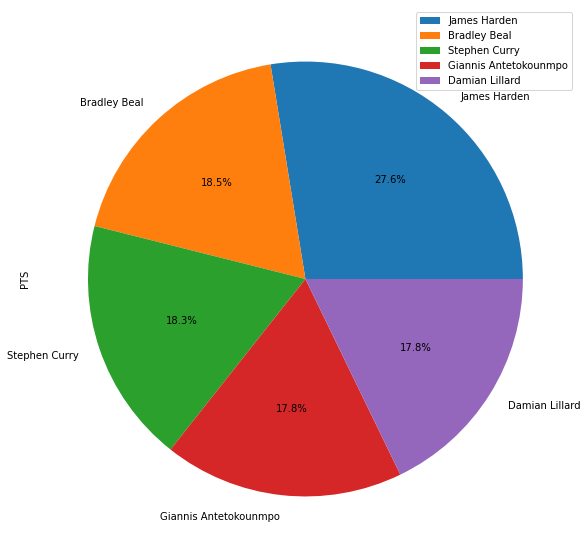

In [102]:
labels = ['James Harden', 'Bradley Beal', 'Stephen Curry', 'Giannis Antetokounmpo', 'Damian Lillard']
sort_by_Tpoints.plot.pie(y='PTS', labels = labels, autopct='%1.1f%%',figsize=(10, 10))

<AxesSubplot:xlabel='Player'>

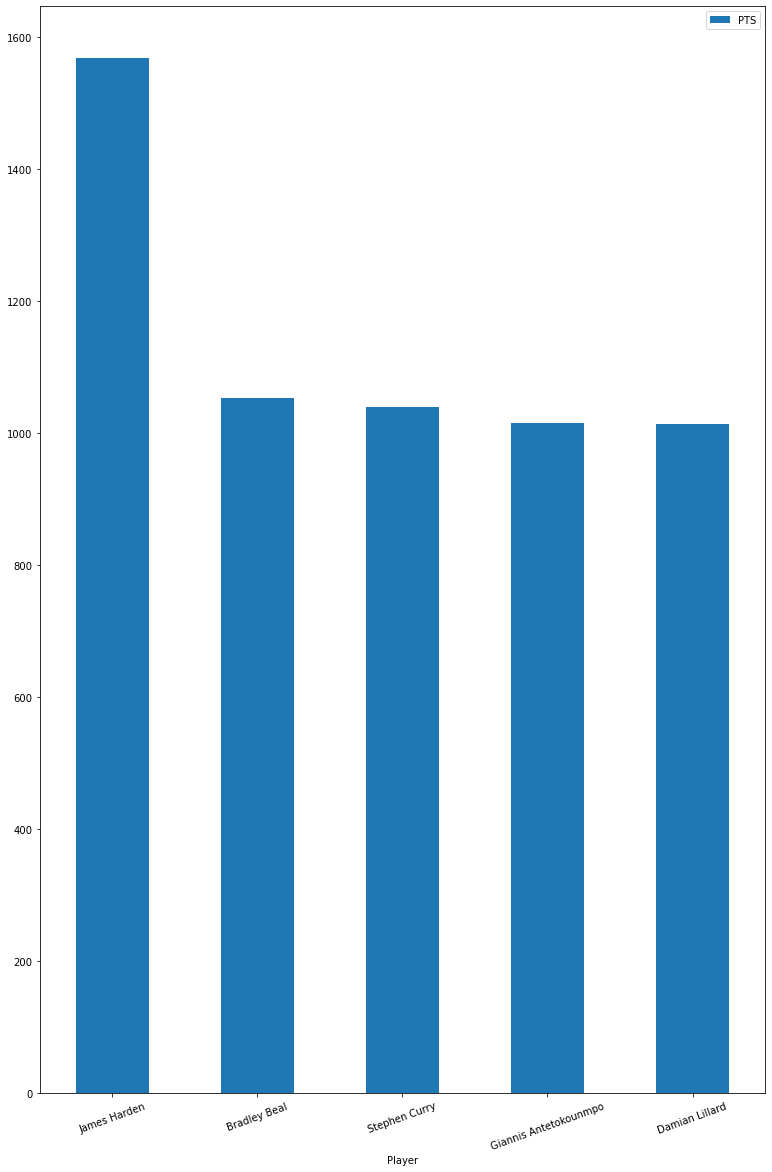

In [103]:
sort_by_Tpoints.plot.bar(x='Player',y='PTS', rot=20, figsize=(13, 20))

## Task 2.2 

In [104]:
NBA = pd.read_csv('NBA_players_stats.csv', index_col=0) # prevent index number from affecting result
# Reloading the file to use the original file so there are errors to work with
NBAE = NBA[["3P","3PA","3P%"]]
NBAE.head()

,3P,3PA,3P%
Rk,,,
1,0,0,NaN
2,0,2,0.00
3,0,1,0.00
4,2,6,0.05
5,27,75,0.36


In [105]:
NBAE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 1 to 492
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3P      512 non-null    int64  
 1   3PA     512 non-null    int64  
 2   3P%     479 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 16.0 KB


In [106]:
NBAE.describe()  #using describe function we can sense that there are some missing values on 3P% at row count

,3P,3PA,3P%
count,512.000000,512.000000,479.000000
mean,27.218750,73.910156,0.316823
std,29.654749,75.700355,0.140463
min,0.000000,0.000000,0.000000
25%,3.000000,9.000000,0.285500
50%,17.000000,50.500000,0.349000
75%,45.000000,119.250000,0.394000
max,169.000000,411.000000,1.000000


The heatmap quickly shows missing values on 3P% column.

In [107]:
df = pd.DataFrame(NBA,columns=['Player','3P%']) #create a temporary dataframe to store Player and 3P% data
nan_values = df[NBA['3P%'].isna()] #check for where the nan values are then output it with the player's name
print (nan_values)

                   Player  3P%
Rk                            
1        Precious Achiuwa  NaN
9           Jarrett Allen  NaN
13   Kostas Antetokounmpo  NaN
22         Udoka Azubuike  NaN
44              Tyler Bey  NaN
54         Marques Bolden  NaN
59            Brian Bowen  NaN
63       Ignas Brazdeikis  NaN
70            Moses Brown  NaN
80         Devontae Cacok  NaN
84           Clint Capela  NaN
102            Tyler Cook  NaN
111              Ed Davis  NaN
121          Devon Dotson  NaN
134          Drew Eubanks  NaN
136            Tacko Fall  NaN
138     Cristiano Felício  NaN
151        Daniel Gafford  NaN
177         Ashton Hagans  NaN
184          Jared Harper  NaN
187          Jalen Harris  NaN
192    Isaiah Hartenstein  NaN
193          Jaxson Hayes  NaN
238          Damian Jones  NaN
247           Enes Kanter  NaN
295         Patrick McCaw  NaN
365          Norvel Pelle  NaN
365          Norvel Pelle  NaN
365          Norvel Pelle  NaN
369          Jakob Poeltl  NaN
370     

This shows every player with a NaN 3P% entry.

Fixing the error by filling nan with zeros

In [114]:
NBAE['3P%'] = NBAE['3P%'].fillna(0) #replace NaN values with 0

<ipython-input-114-1498e2a3bc22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBAE['3P%'] = NBAE['3P%'].fillna(0)


In [115]:
checkna = NBA['3P'].isnull().values.any() # Quick check ensuring the fill has gone as expected
checkna

False

## Task 2.3 


In [109]:
columns = NBA_C[['Player','FG','3P','2P','PTS']]
columns = columns.head(10)
columns.loc[columns['PTS'] > 2000, 'PTS'] = list((columns.loc[columns['PTS'] > 2000].PTS/100).astype(int))
columns

,Player,FG,3P,2P,PTS
Rk,,,,,
1,Precious Achiuwa,84,0,84,212.0
2,Jaylen Adams,1,0,1,200.0
3,Steven Adams,115,0,115,265.0
4,Bam Adebayo,236,2,234,634.0
5,LaMarcus Aldridge,115,27,88,288.0
6,Ty-Shon Alexander,0,0,0,0.0
7,Nickeil Alexander-Walker,86,30,56,230.0
8,Grayson Allen,67,46,21,214.0
9,Jarrett Allen,344,8,336,942.0


<AxesSubplot:xlabel='Rk'>

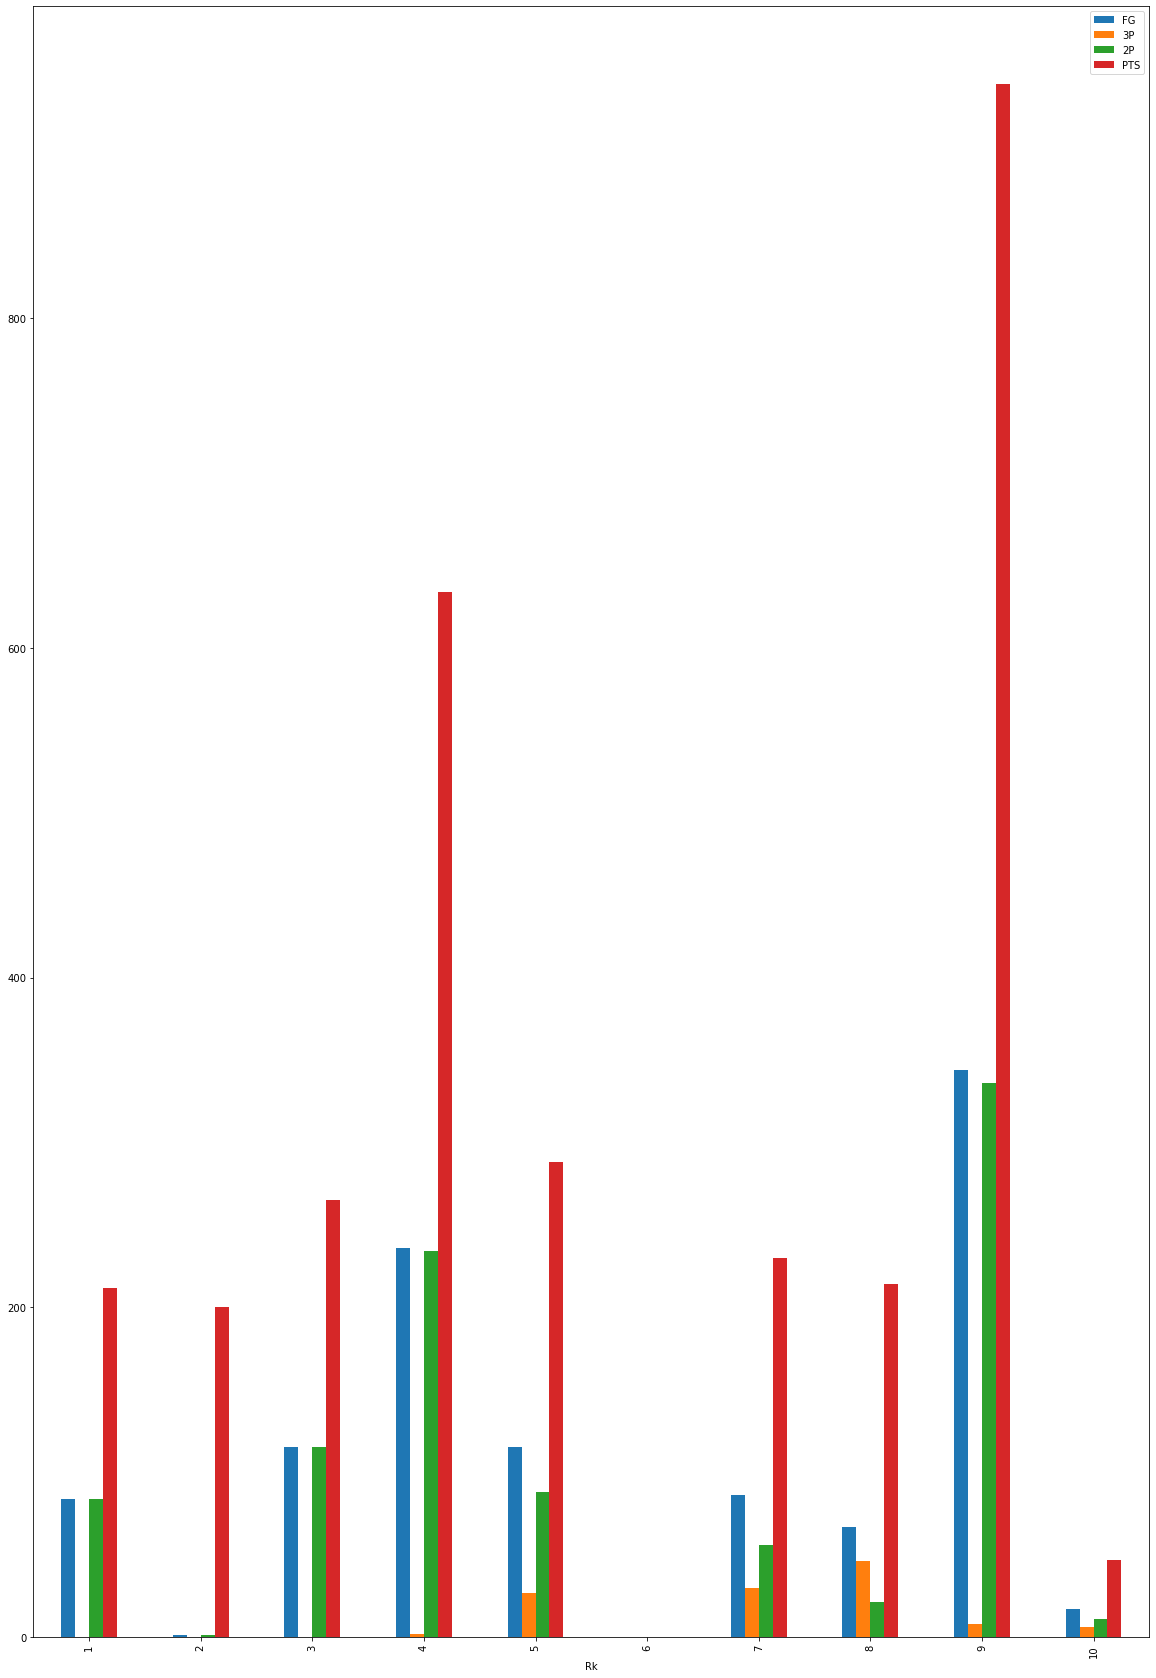

In [110]:
columns.plot.bar(figsize=(20,30))